# <i><b><center> Import Libraries

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")

# <i><b><center> Models Function
### <i><b><center> Contain:
<center><i><b> - LinearRegreesion()
<center><i><b> - Lasso()
<center><i><b> - Ridge()


In [172]:
def models(df, target_column, test_size):
    
    data = df.copy()

    obj_cols = data.select_dtypes(include='object').columns
    encoder = LabelEncoder()
        
    for col in obj_cols:
        if data[col].dtype == 'object':
            data[col] = encoder.fit_transform(data[col])

    X = data.drop(columns=target_column)
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(),
        'Ridge Regression': Ridge(),
    }

    results = {}

    for name, model_instance in models.items():
        model_instance.fit(X_train_scaled, y_train)
        predictions = model_instance.predict(X_test_scaled)
    

        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        score = model_instance.score(X_test_scaled, y_test)
        
        results[name] = {
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'Accuracy': score,
        }
    
    return pd.DataFrame(results).reset_index().rename(columns={'index': 'Metric'})

# <i><b><center> Outlier Remover Function

In [173]:
def remove_outliers(data):
    for col in data.select_dtypes(exclude='object').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data


# <i><b><center> Metric Plot Function

In [174]:
def plot_metric(result):
    df_melted = result.melt(id_vars='Metric', var_name='Model', value_name='Score')
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', padding=3)

    plt.title('Model Evaluation Metric', fontsize=16, weight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score (Log Scale)', fontsize=12)
    plt.xticks(rotation=15, fontsize=10)
    plt.legend(title='Metric', loc='best', fontsize=10)
    
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

# <i><b><center> Import Dataset
### <i><b><center> 1. multiple_linear_regression_dataset.csv

In [175]:
data_set_1 = pd.read_csv('./multiple_linear_regression_dataset.csv')
data_set_1.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [176]:
data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [177]:
data_set_1.duplicated().sum()

np.int64(0)

In [178]:
data_set_1.shape

(20, 3)

In [179]:
data_set_1 = remove_outliers(data=data_set_1)
result_data_set_1 = models(data_set_1, 'income', 0.2)

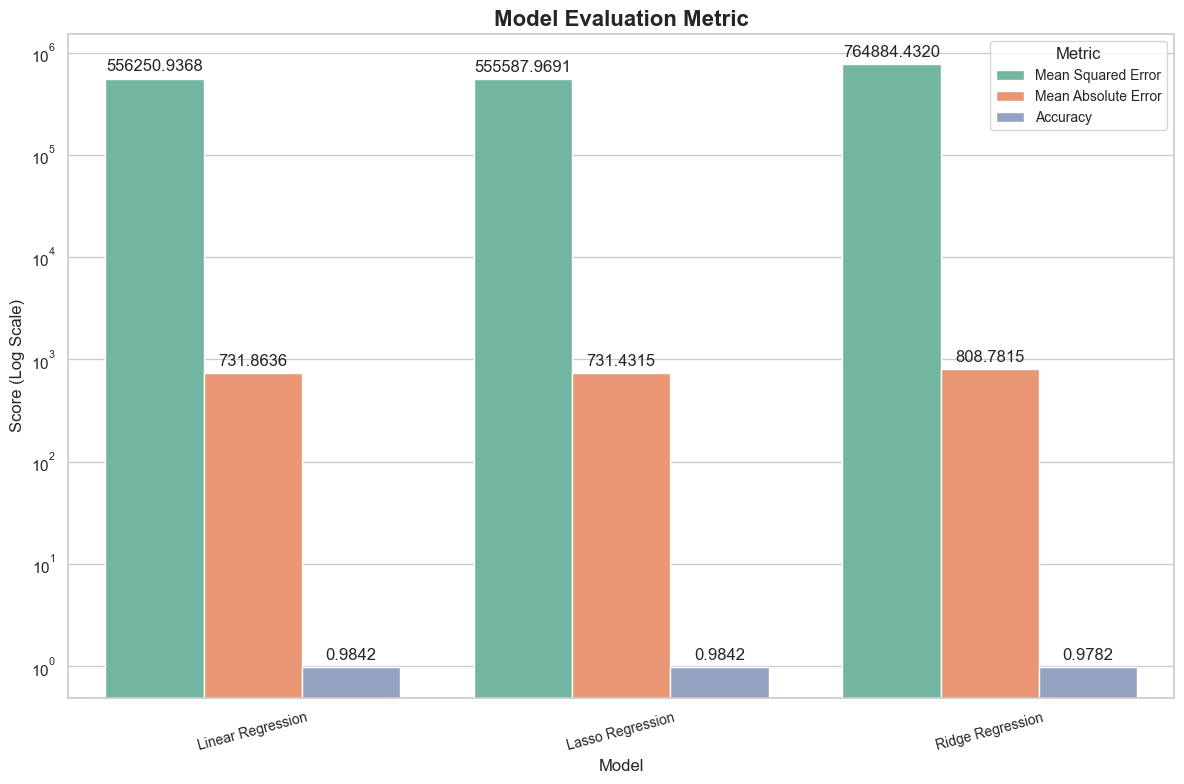

In [180]:
plot_metric(result_data_set_1)

### <i><b><center> 2. Real estate.csv

In [181]:
data_set_2 = pd.read_csv("./Real estate.csv", index_col="No")
data_set_2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [182]:
data_set_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [183]:
data_set_2.duplicated().sum()

np.int64(0)

In [184]:
data_set_2.shape

(414, 7)

In [185]:
# data_set_2 = remove_outliers(data_set_2)

In [186]:
data_set_2.shape

(414, 7)

In [187]:
result_data_set_2 = models(data_set_2, 'Y house price of unit area', 0.2)
result_data_set_2

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,Mean Squared Error,53.505619,55.784040,53.448497
1,Mean Absolute Error,5.305356,5.635385,5.302237
2,Accuracy,0.681058,0.667477,0.681399


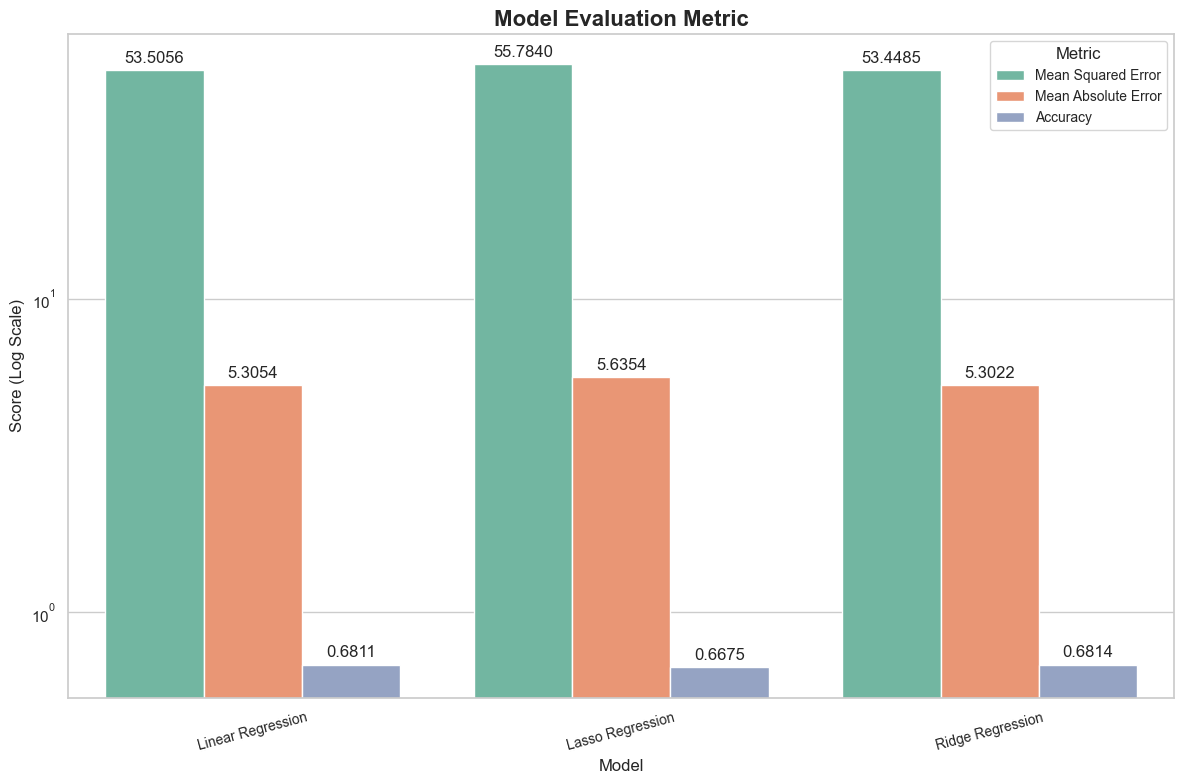

In [188]:
plot_metric(result_data_set_2)

### <i><b><center> 3. Salary_dataset.csv

In [189]:
data_set_3 = pd.read_csv("./Salary_dataset.csv", index_col='Unnamed: 0')
data_set_3.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [190]:
data_set_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [191]:
data_set_3.duplicated().sum()

np.int64(0)

In [192]:
data_set_3 = remove_outliers(data_set_3)
data_set_3.shape

(30, 2)

In [203]:
result_data_set_3 = models(data_set_3, 'Salary', 0.2)
result_data_set_3

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,Mean Squared Error,4.983010e+07,4.983107e+07,5.171076e+07
1,Mean Absolute Error,6.286454e+03,6.286367e+03,6.192216e+03
2,Accuracy,9.024462e-01,9.024443e-01,8.987643e-01


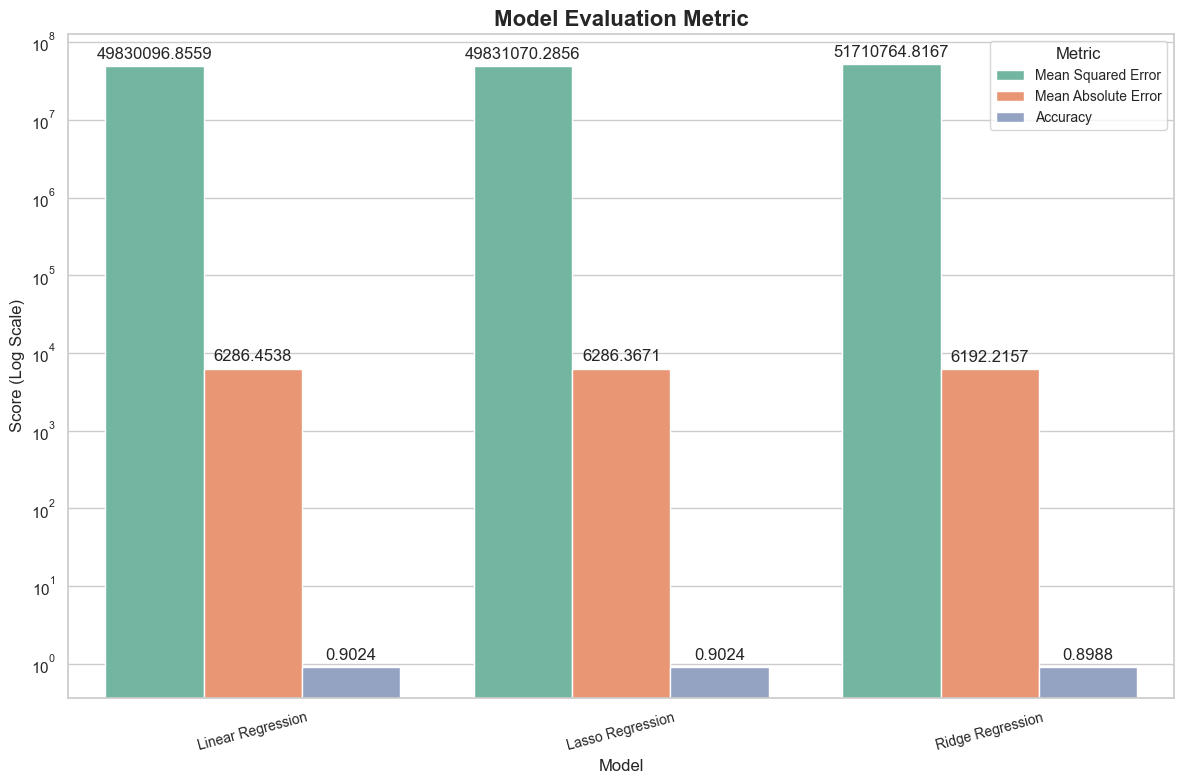

In [204]:
plot_metric(result_data_set_3)

### <i><b><center> 3. Salary_dataset.csv

In [195]:
data_set_4 = pd.read_csv("./Student_Performance.csv")
data_set_4.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [196]:
data_set_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [197]:
data_set_4.duplicated().sum()

np.int64(127)

In [198]:
data_set_4.drop_duplicates(inplace=True)

In [199]:
data_set_4.shape

(9873, 6)

In [200]:
data_set_4 = remove_outliers(data_set_4)

In [201]:
result_data_set_4 = models(data_set_4, 'Performance Index', 0.2)
result_data_set_4

,Metric,Linear Regression,Lasso Regression,Ridge Regression
0,Mean Squared Error,4.305901,7.726660,4.305945
1,Mean Absolute Error,1.646970,2.213166,1.646954
2,Accuracy,0.988430,0.979239,0.988430


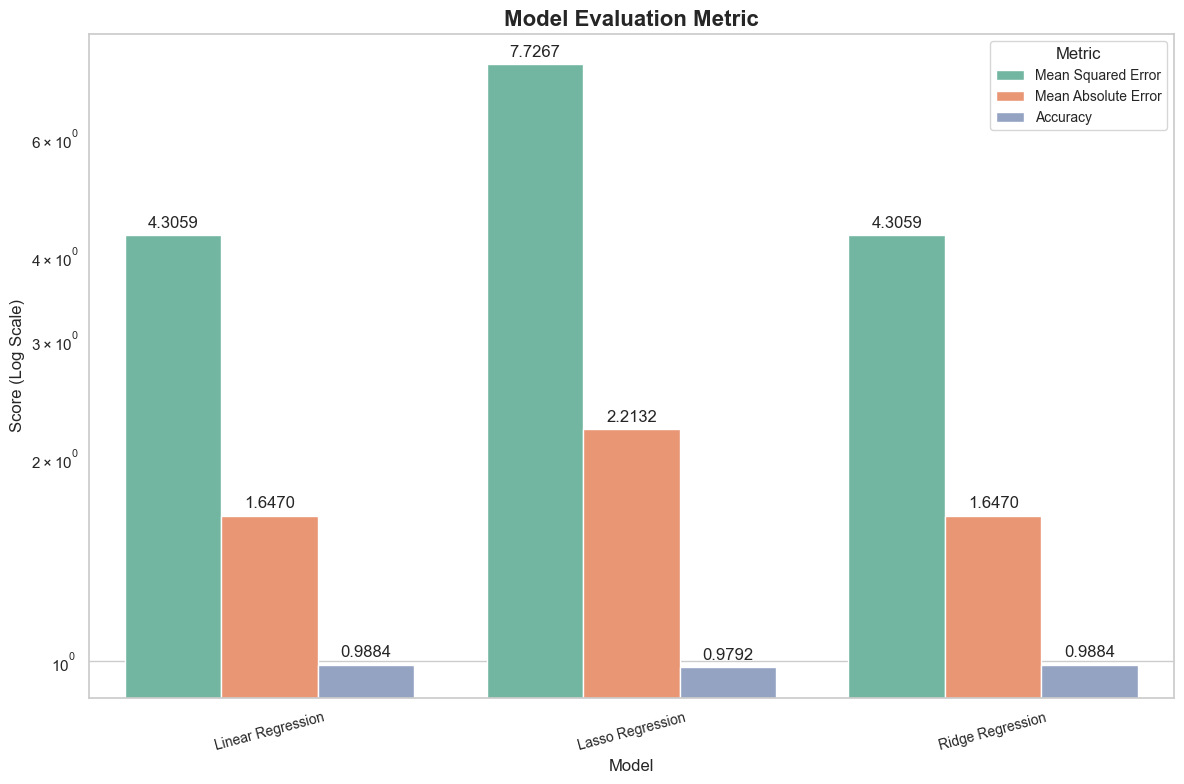

In [202]:
plot_metric(result_data_set_4)